In [1]:
import pandas as pd
import numpy as np
import swifter
import json
import math
import time
import ast
import re

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN

In [2]:
with open("dictionary.json") as file:
    dictionary =      {int(k):v for k,v in json.load(file).items()}
with open("dictionary_rev.json") as file:
    dictionary_rev =  {k:int(v) for k,v in json.load(file).items()}
with open("docs_containing.json") as file:
    docs_containing = {int(k):v for k,v in json.load(file).items()}
with open("dict_idf.json") as file:
    dict_idf =        {int(k):v for k,v in json.load(file).items()}
    
df = pd.read_csv("tfidf.csv", index_col=0).drop(columns="File")
df.head(5)

,Raw,Tokens,Idxs,Count,TF,TFIDF
0,CHARITY\nTrustees' Annual Report for the perio...,"['charity', 'trustee', 'annual', 'report', 'pe...","[9867, 59972, 2629, 50012, 45587, 11583, 45587...","{9867: 38, 59972: 24, 25451: 17, 53034: 17, 41...","{9867: 0.03561387066541706, 59972: 0.022492970...","{9867: 0.00021632391102468634, 59972: 0.000188..."
1,Charity Name\nNo lif anv)\nStepping Stone Thea...,"['charity', 'name', 'step', 'stone', 'theatre'...","[9867, 41147, 56109, 56292, 58371, 49051, 4517...","{28257: 14, 39077: 12, 41469: 11, 25451: 11, 5...","{28257: 0.020558002936857563, 39077: 0.0176211...","{28257: 1.0339581044892153e-05, 39077: 0.01390..."
2,Promoting Independent Living\nAbility\nAbility...,"['promote', 'independent', 'living', 'ability'...","[47572, 31069, 36253, 199, 199, 199, 199, 2862...","{64581: 205, 29724: 173, 24031: 157, 3694: 134...","{64581: 0.019462641222823505, 29724: 0.0164245...","{64581: 1.4687262924544409e-05, 29724: 0.01172..."
3,Annua Report &\nAccounts 2017/18\nYear ended 3...,"['annua', 'report', 'account', 'year', 'end', ...","[2628, 50012, 417, 64581, 19701, 37983, 38872,...","{38872: 310, 673: 227, 58346: 161, 50012: 135,...","{38872: 0.022029562251279135, 673: 0.016131324...","{38872: 0.01178830958827304, 673: 0.0078316821..."
4,"The Greenway Centre\n(Registered charity, numb...","['greenway', 'centre', 'register', 'charity', ...","[27152, 9466, 49509, 9867, 42660, 24031, 55974...","{9867: 20, 417: 16, 9466: 15, 59972: 14, 27152...","{9867: 0.025157232704402517, 417: 0.0201257861...","{9867: 0.00015280874747655764, 417: 7.62037771..."


In [4]:
df.iloc[:, 1:] = df.iloc[:,1:].swifter.applymap(ast.literal_eval)

# Top 10

In [4]:
df["Top10"] = df["TFIDF"].apply(lambda x:
    dict(sorted(x.items(), key=lambda i:i[1])[::-1][:10])
)

In [5]:
top10_collection = []
for idx in df.index:
    top10_collection.extend(df.loc[idx, "Top10"])
top10_collection = sorted(set(top10_collection))

print("Top 10 collection contains", len(top10_collection), "unique tokens..",
      round(len(top10_collection)/len(dictionary)*100, 2), "% of total dictionary")

Top 10 collection contains 7147 unique tokens.. 10.99 % of total dictionary


# Top 25

In [6]:
df["Top25"] = df["TFIDF"].apply(lambda x:
    dict(sorted(x.items(), key=lambda i:i[1])[::-1][:25])
)

In [7]:
top25_collection = []
for idx in df.index:
    top25_collection.extend(df.loc[idx, "Top25"])
top25_collection = sorted(set(top25_collection))

print("Top 25 collection contains", len(top25_collection), "unique tokens..",
      round(len(top25_collection)/len(dictionary)*100, 2), "% of total dictionary")

Top 25 collection contains 16330 unique tokens.. 25.12 % of total dictionary


# Top 50

# Top 100

# All Terms

# Collections

In [8]:
collections = {
    "Top10" : top10_collection,
    "Top25" : top25_collection,
    #"Top50" : top50_collection,
    #"Top100": top100_collection,
    #"All"   : total_collection
}

## Vectorization

In [9]:
def set_vector(top_x: str="Top10") -> None:
    df["Vector"] = df[top_x].swifter.apply(lambda x: 
        list(map(lambda idx: x[idx] if idx in x else 0, collections[top_x]))
    )

# Matrix

In [10]:
string = "Top10"
set_vector(string)
matrix = np.array(list(map(np.array, df["Vector"])))

print(string, "matrix shape:", matrix.shape)
print("Total elements:", matrix.shape[0] *matrix.shape[1])


Top10 matrix shape: (1728, 7147)
Total elements: 12350016


In [ ]:
from sklearn.decomposition import PCA
#digits = datasets.load_digits()
#clst = KMeans(n_clusters=10).fit(digits.data)
#digits_2d = PCA(n_components=2).fit_transform(digits.data)
matrix_3d = PCA(n_components=100).fit_transform(matrix)
#df = DataFrame(digits.data)
#df["cluster"] = clst.predict(digits.data)
#df["label"] = digits.target
#df["x"] = digits_3d[:,0]
#df["y"] = digits_3d[:,1]
#df["z"] = digits_3d[:,2]
#print("Accuracy:", round(metrics.accuracy_score(df.label, df.cluster), 2), "%")

#for lab in df["cluster"].unique():
#    data = df[df["cluster"] == lab]
#    plt.scatter(data.x, data.y)
#plt.show()



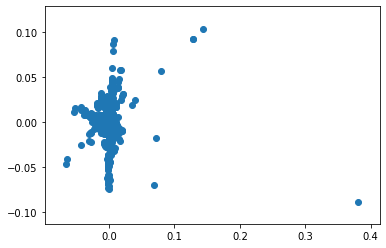

In [22]:
plt.scatter(matrix_3d[:, 7],matrix_3d[:, 6])

# DBSCAN
Density based over kmeans because **n_clusters unknown**

### Meta EPS

EPS: 0.10555555555555556, 32 clusters (-1: 795,  0: 783, rest: 5)  
EPS: 0.08333333333333333, 48 clusters (-1: 1089, 0: 409, rest: 5)

### Meta min_samples

Clusters break apart *x>5* using **top10** terms

### Meta match
Finding optimal epsilon value

### Apply meta dbscan

In [11]:
meta_eps = 0.10222222222222221

start = time.time()
df["Dbscan"] = DBSCAN(eps=meta_eps, min_samples=3).fit_predict(matrix)
print("Clustering took", round(time.time() -start, 2), "seconds.")

print("Epsilon:", meta_eps)
print("Total", df["Dbscan"].nunique(), "clusters found")
print("Still", df["Dbscan"].value_counts()[0], "docs in the BLOB")
print("There are", df["Dbscan"].value_counts()[-1], "OUTLIERS")
for clusters in df["Dbscan"].value_counts()[2:].value_counts().items():
    print("Found", clusters[1], "clusters of", clusters[0])
print("\n")

Clustering took 43.72 seconds.
Epsilon: 0.10222222222222221
Total 2 clusters found
Still 1719 docs in the BLOB
There are 9 OUTLIERS




Clustering took 25.73 seconds.  
Epsilon: 0.10222222222222221  
Total 107 clusters found  
Still 709 docs in the BLOB  
There are 602 OUTLIERS  
Found 46 clusters of 3  
Found 34 clusters of 5  
Found 23 clusters of 4  
Found 1 clusters of 10  
Found 1 clusters of 7  

### Rerun
Clustering the remaining docs in the **main blob**  
Keep track of **true index** with *I to Idx dictionary*

In [202]:
cluster_ceil = df["Dbscan"].max()
blob = np.array(list(map(np.array, df[df["Dbscan"]==0]["Vector"])))
blob_dict = {i: idx for i, idx in enumerate(df[df["Dbscan"]==0]["Vector"].index)}
print("Blob matrix shape:", blob.shape)
print("Total elements:", blob.shape[0] *blob.shape[1])

Blob matrix shape: (709, 7146)
Total elements: 5066514


Epsilon: 0.05333333333333333  
Total 59 clusters found  
Still 3 docs in the BLOB  
There are 431 OUTLIERS  
Found 28 clusters, size 3  
Found 12 clusters, size 4  
Found 15 clusters, size 5  
Found 1 clusters, size 6  
Found 1 clusters, size 62  
Blob reduced by 38.8 %  

#### ! Blob here isn't "0"

### Adjust blob cluster
Make sure to **offset** the new clusters as to not overwrite

In [203]:
meta_eps_blob = 0.05333333333333333

rerun = np.array(DBSCAN(eps=meta_eps_blob, min_samples=3).fit_predict(blob))
for i, cluster in enumerate(rerun):
    df.loc[blob_dict[i], "Dbscan"] = cluster + cluster_ceil if cluster not in [-1, 0] else cluster

# Evaluate

In [201]:
print("BEFORE RERUN\n")
print("Total", df["Dbscan"].nunique(), "clusters found")
print("Still", df["Dbscan"].value_counts()[0], "docs in the BLOB")
print("There are", df["Dbscan"].value_counts()[-1], "OUTLIERS")
for clusters in df["Dbscan"].value_counts()[2:].value_counts().items():
    print("Found", clusters[1], "clusters of", clusters[0])

BEFORE RERUN

Total 107 clusters found
Still 709 docs in the BLOB
There are 602 OUTLIERS
Found 46 clusters of 3
Found 34 clusters of 5
Found 23 clusters of 4
Found 1 clusters of 10
Found 1 clusters of 7


In [204]:
print("AFTER RERUN\n")
print("Total", df["Dbscan"].nunique(), "clusters found")
print("Still", df["Dbscan"].value_counts()[0], "docs in the BLOB")
print("There are", df["Dbscan"].value_counts()[-1], "OUTLIERS")
for clusters in df["Dbscan"].value_counts()[2:].value_counts().items():
    print("Found", clusters[1], "clusters of", clusters[0])

AFTER RERUN

Total 164 clusters found
Still 3 docs in the BLOB
There are 1033 OUTLIERS
Found 75 clusters of 3
Found 49 clusters of 5
Found 35 clusters of 4
Found 1 clusters of 10
Found 1 clusters of 7
Found 1 clusters of 6


# Find optimal eps for 10% outliers

In [ ]:
    eps = start_eps = .15
    percent_10 = len(df) / 15

    df["Label"] = [0 for i in range(len(df))]
    cluster_ceil = df["Label"].max()

    inner, outer = 0, 1
    while True:
        print("Iteration -", outer, "\n")
        i_to_idx = {i: idx for i, idx in enumerate(df[df["Label"]==0]["Vector"].index)}
        blob = np.array(list(map(np.array, df[df["Label"]==0]["Vector"])))

        dbscan = None
        while True:
            dbscan = DBSCAN(eps=eps, min_samples=3).fit_predict(blob)
            cluster_count = dict(zip(*np.unique(dbscan, return_counts=True)))

            print("Reduction", f"{outer}.{inner}")
            print("Epsilon:", eps)
            print("Clusters:", len(cluster_count))
            print("Blob:", cluster_count[0])
            print("Out:", cluster_count[-1], "\n")

            if cluster_count[-1] < percent_10:
                break

            eps += .01
            inner += 1

        for i, cluster in enumerate(dbscan):
            df.loc[i_to_idx[i], "Label"] = cluster + cluster_ceil if cluster not in [-1, 0] else cluster        
        cluster_ceil = df["Label"].max()

        print("Blob:",df["Label"].value_counts()[0], "Out:", df["Label"].value_counts()[-1])
        for clusters in df["Label"].value_counts().drop([-1, 0]).value_counts().items():
            print("Found", clusters[1], "clusters of", clusters[0])
        print("\n")

        outer += 1
        inner = 0
        
        if eps == start_eps: eps = start_eps = start_eps - .03
        else: eps = start_eps
        if eps <= 0: break

In [308]:
df.drop(columns=df.columns[2:-1]).to_csv("labeled.csv")